# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())
ids

loading annotations into memory...
Done (t=6.54s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


[156,
 509,
 603,
 918,
 1072,
 1727,
 1728,
 1767,
 1768,
 1769,
 1773,
 1774,
 2144,
 2251,
 2255,
 2259,
 2280,
 2281,
 2496,
 2498,
 2500,
 2526,
 2532,
 2534,
 2544,
 2551,
 3003,
 3165,
 3186,
 3212,
 3323,
 3375,
 3419,
 3488,
 3658,
 3692,
 3817,
 4047,
 4061,
 4079,
 4254,
 4430,
 4474,
 4594,
 4654,
 4703,
 4893,
 4932,
 4940,
 5037,
 5181,
 5544,
 5560,
 5585,
 5623,
 5637,
 5652,
 5812,
 6099,
 6104,
 6172,
 6174,
 6259,
 6656,
 7023,
 7064,
 7158,
 7178,
 7228,
 7287,
 7305,
 7319,
 7486,
 7514,
 7544,
 7588,
 7670,
 7793,
 7880,
 7910,
 7915,
 7981,
 8000,
 8032,
 8084,
 8442,
 8715,
 8721,
 8793,
 8807,
 8915,
 8989,
 9022,
 9024,
 9031,
 9040,
 9065,
 9120,
 9155,
 9280,
 9417,
 9553,
 9626,
 9657,
 9819,
 9940,
 10032,
 10071,
 10176,
 10187,
 10385,
 10442,
 10449,
 10527,
 10600,
 10750,
 11070,
 11097,
 11207,
 11272,
 11290,
 11381,
 11491,
 11554,
 11571,
 11592,
 11640,
 11650,
 11660,
 11682,
 11706,
 11840,
 11970,
 12030,
 12047,
 12182,
 12282,
 12414,
 12543

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000455267.jpg


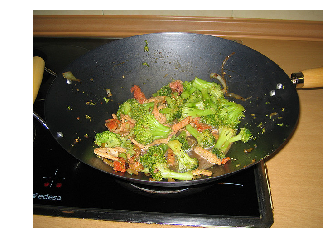

a wok on a stove cooking some food
A skillet filled with a bunch of vegetables being cooked.
A wok with a cooked broccoli meal in it.
The vegetables are cooking in the skillet on the stove.
A picture of some food in the kitchen.


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)